## 2.3 Task 3
## Calculating Bias and Variance




In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate


### 2.3.1 : Resample of data

STEP : 1 -
    Loading and displaying the training data and make a set of 20 random dataset

In [10]:
num_splits = 20
total_degree = 15

with open('train_dataset.pickle' , 'rb') as td :
    train_data = pickle.load(td)


with open ('test_dataset.pickle' , 'rb') as td :
    test_data = pickle.load(td)


# print(test_data)
# print(len(test_data))
# print(train_data)
# print(len(train_data))

np.random.shuffle(train_data)
train_data_splits = np.array_split(train_data, num_splits)


## 2.3.2 : Task
STEP:2 - Dividing the data (train and test ) into two seperate part. where train data are present in dataset and plotting the initial test data and train data .

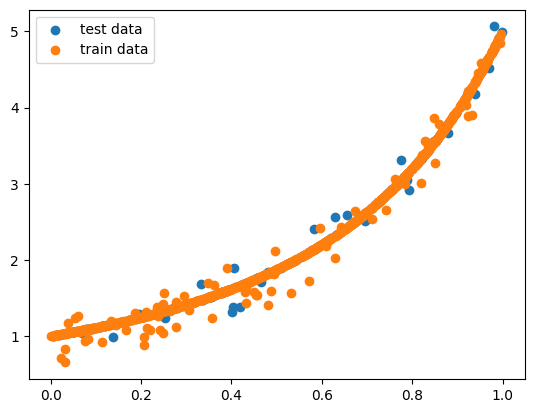

In [11]:
x_train, y_train = [], []
for i in range (0,num_splits):
    x_train.append([[x] for x in train_data_splits[i][:,0]]) # seperating x point and y point in different array
    y_train.append(train_data_splits[i][:,1])


for i in range (0,num_splits):
    x_train[i] = np.vstack(x_train[i])
    y_train[i] = np.vstack(y_train[i])


x_test = [[x] for x in test_data[:,0]]    # seperating x point and y point in different array
y_test = [[x] for x in test_data[:,1]]
 # Convert x_test and y_test to 2D arrays
x_test = np.vstack(x_test)
y_test = np.vstack(y_test)

# print(y_train)
# print(y_train)
# print(x_test)
# print(y_test)

plt.scatter(x_test , y_test , label='test data')
plt.scatter(x_train ,y_train , label='train data')
plt.legend()
plt.show()


STEP : 3 - Defining the mean square error

In [12]:
def mean_squared_error(y, y_cap):
    err = np.array(y) - np.array(y_cap)
    return (np.mean(err**2))

STEP : 4 - Defining the bias , bias^2 , mean , variance , MSE .

In [13]:
bias = []
bias2 = []
variance = []
overall_predictions = []
error = []
cur = []
for deg in range(1 , 16):
    output = []
    pred_dist = []
    mse_degree = []
    curr = 0
    
    for dist in range(0 , 20):
        x_deg_train = x_train[dist]
        y_deg_train = y_train[dist]
        # model = LinearRegression().fit(PolynomialFeatures(degree=deg).fit_transform(x_deg_train , y_deg_train))
        model = LinearRegression().fit(PolynomialFeatures(degree=deg).fit_transform(x_deg_train), y_deg_train)
        pred = model.predict(PolynomialFeatures(degree=deg).fit_transform(x_test))
        pred_dist.append(pred)
        mse_degree.append(mean_squared_error(y_test , pred))
        curr += mean_squared_error(y_test , pred)

    curr = curr/num_splits
    cur.append(np.mean(curr))
    error.append(np.mean(mse_degree))    
    pred_dist = np.array(pred_dist)
    overall_predictions.append(pred_dist)
    k = np.mean(abs(np.mean(pred_dist , axis=0) - y_test))
    k2 = np.mean(abs(np.mean(pred_dist , axis=0) - y_test) ** 2)
    bias.append(k)
    bias2.append(k2)
    variance.append(np.mean(np.var(pred_dist , axis=0)))


# print(bias)
# print("")
# print(bias2)
# print(variance)
# print(min(variance) , "and " , max(variance))
# print(cur)
# print(error)







### Plotting the graph between train data and test data for each of 15 degree.




In [14]:
mean_predictions = np.mean(overall_predictions , axis=1)

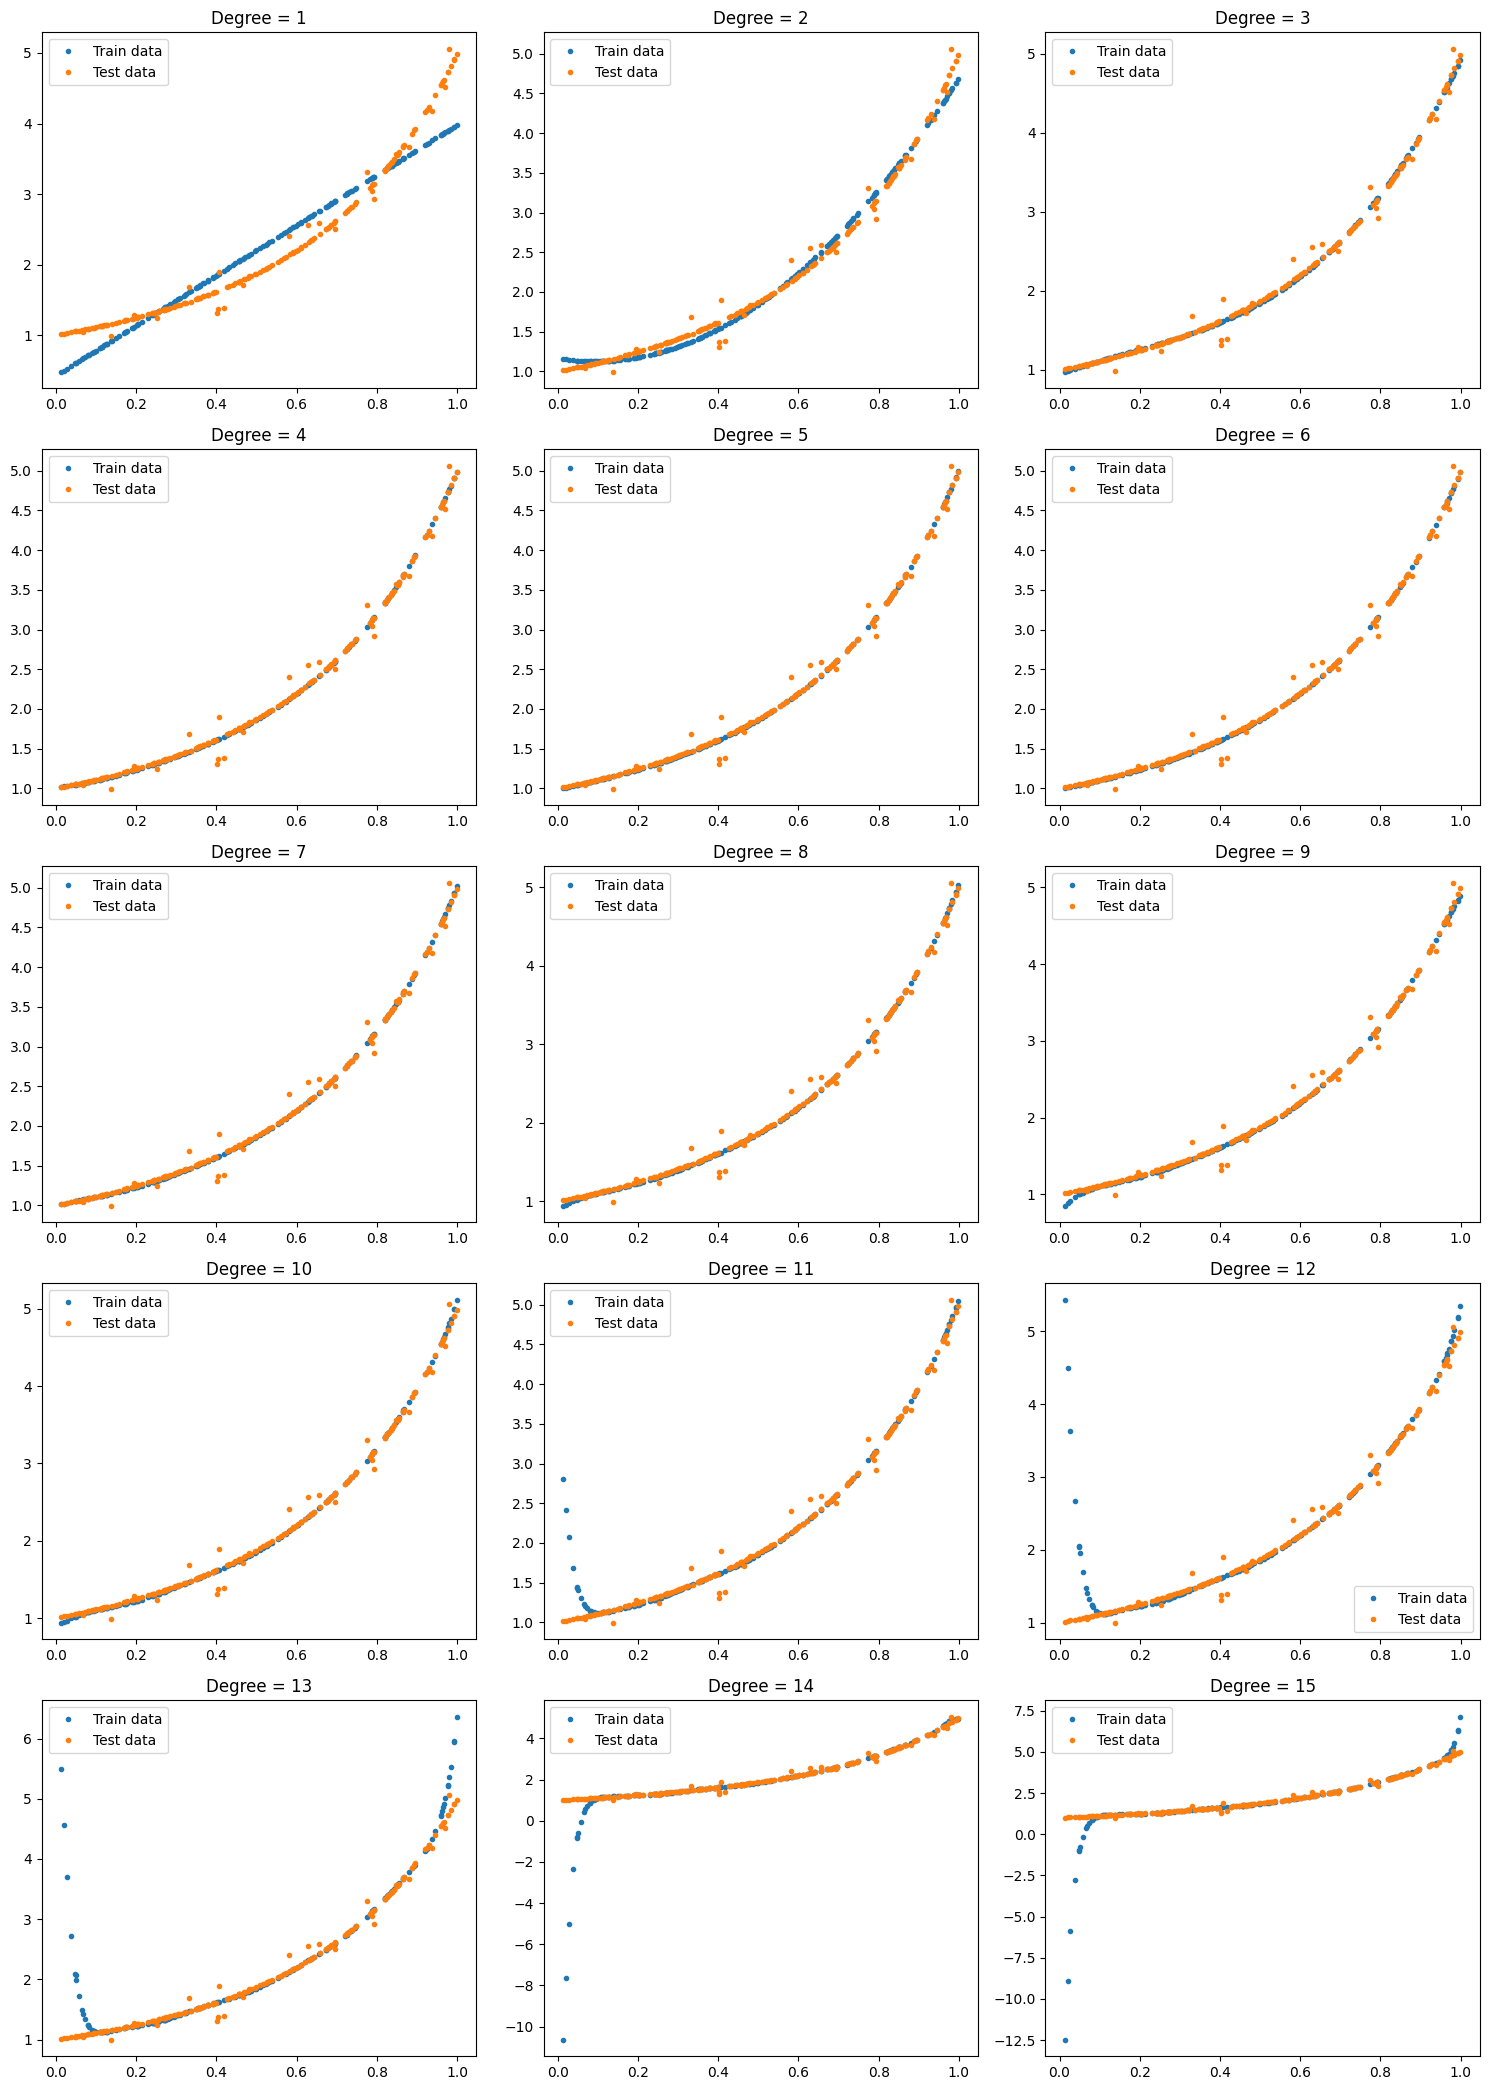

In [15]:
# for deg in range(1,16):
#     plt.title('degree =' +str(deg))
#     plt.plot(x_test, mean_predictions[deg-1], '.', label='train_data')
#     plt.plot(x_test, y_test, '.', label='test_data')
#     plt.legend()
#     plt.show()   
# 
# 
fig, axes = plt.subplots(5, 3, figsize=(15, 21))  # Create a 3x5 grid of plots

for deg, ax in zip(range(1, 16), axes.flatten()):  # Iterate over degrees and subplots
    ax.set_title('Degree = {}'.format(deg))
    ax.plot(x_test, mean_predictions[deg-1], '.', label='Train data')
    ax.plot(x_test, y_test, '.', label='Test data')
    ax.legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show() 


## 2.4 Irreducible error 
### Calculating Irreducible Error

Irreducible errors : [ 1.12757026e-17 -7.15573434e-18  3.03576608e-18 -1.40946282e-18
  2.16840434e-18 -8.67361738e-19 -2.60208521e-18 -3.90312782e-18
  1.73472348e-18  3.46944695e-18 -1.11022302e-16  0.00000000e+00
  8.88178420e-16 -7.10542736e-15  2.13162821e-14]
-7.105427357601002e-15 2.1316282072803006e-14


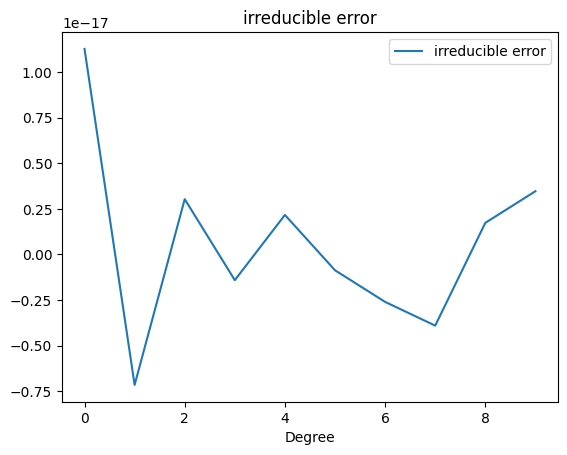

In [16]:
## Calculate the irreducible error for each of the models

irreducible_error = np.array(error) - np.array(bias2) - np.array(variance)
print("Irreducible errors :" ,  irreducible_error)
print(min(irreducible_error) ,  max(irreducible_error))


plt.plot(irreducible_error[:10], label='irreducible error')
plt.xlabel('Degree')

plt.title('irreducible error')
plt.legend()
plt.show()


## Graph between Bias and variance

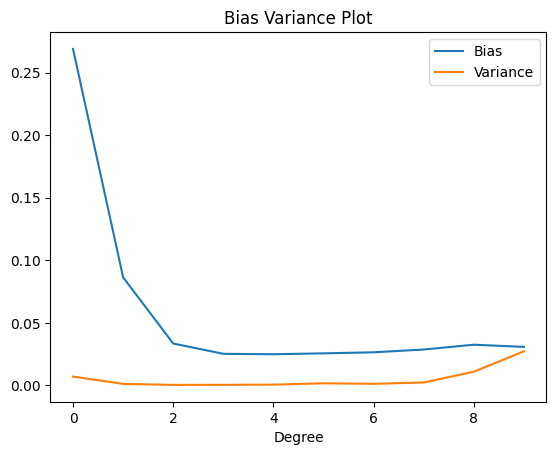

| Degree    | Bias       | Variance  |
----------  -----------  ---------------
| 1         | 0.2689350  |  0.0070667 |
| 2         | 0.0863852  |  0.0012364 |
| 3         | 0.0334971  |  0.0004108 |
| 4         | 0.0252571  |  0.0004715 |
| 5         | 0.0249328  |  0.0006390 |
| 6         | 0.0256413  |  0.0017160 |
| 7         | 0.0264824  |  0.0012955 |
| 8         | 0.0287111  |  0.0023661 |
| 9         | 0.0325512  |  0.0109972 |
| 10        | 0.0308061  |  0.0272718 |
| 11        | 0.0629901  |  0.7013535 |
| 12        | 0.1232535  |  4.4232844 |
| 13        | 0.1506415  |  5.1346400 |
| 14        | 0.2250554  |  25.5256749 |
| 15        | 0.2829197  |  51.0012563 |


In [17]:
# print(bias)
plt.plot(bias[:10], label='Bias')
plt.plot(variance[:10], label='Variance')
# plt.scatter(range(1,16),bias[:15], label='Bias')
# plt.scatter(range(1,16),variance[:15], label='Variance')
plt.xlabel('Degree')
plt.title('Bias Variance Plot')
plt.legend()
plt.show()

degree = np.linspace(1, 20, 20)

data = list(zip(degree, bias, variance))
headers = ['| Degree', '| Bias  ', '| Variance  |']

table = [[f"| {d:.0f}", f"| {b:.7f}   ", f"|  {v:.7f} |"] for d, b, v in data]
print(tabulate(table, headers=headers))
# print(variance)


## Bias^2 Vs variance plot


0.0047215441373918855


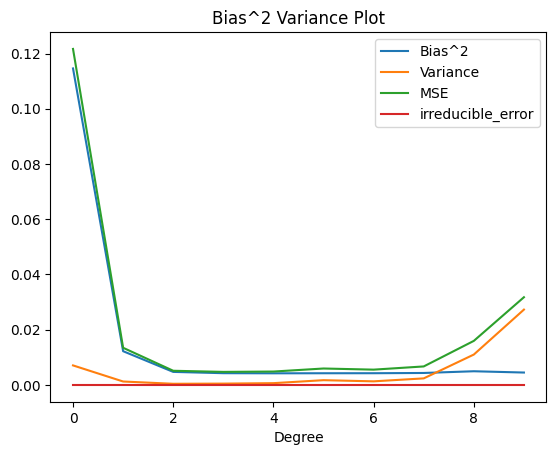

In [18]:
plt.plot(bias2[:10], label='Bias^2')
plt.plot(variance[:10], label='Variance')
plt.plot(error[:10] , label="MSE")
plt.plot(irreducible_error[:10] , label="irreducible_error")
print(min(error))
# plt.scatter(range(1,1),bias2[:10], label='Bias^2')
# plt.scatter(range(1,11),variance[:10], label='Variance')
plt.xlabel('Degree')
plt.title('Bias^2 Variance Plot')
plt.legend()
plt.show()


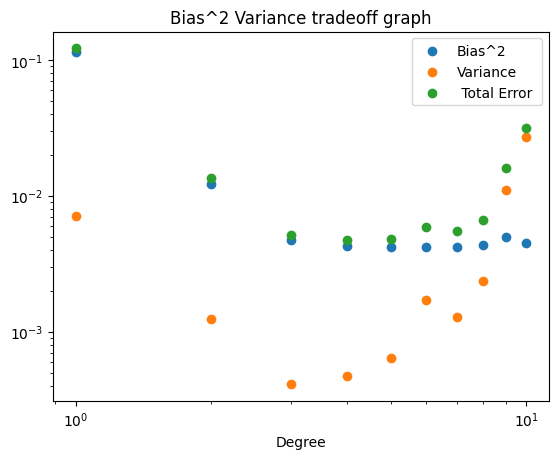

[0.12166199151794703, 0.013447793234091603, 0.005125532677566094, 0.0047215441373918855, 0.004843302296082718, 0.005943433953671871, 0.005532877822302227, 0.0066920864922443615, 0.01594639210260742, 0.03175543462420678, 0.7417815857059163, 4.653115752933651, 5.3995007839371425, 26.88563206396945, 52.839128377425176]


In [19]:
plt.scatter(range(1,11),bias2[:10], label='Bias^2')
plt.scatter(range(1,11),variance[:10], label='Variance')
plt.scatter(range(1,11),error[:10], label=' Total Error ')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.title('Bias^2 Variance tradeoff graph')
plt.legend()
plt.show()
print(error)
